In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

X = iris.data # possède 150 échantillons
y = iris.target

print(X.shape)

(150, 4)


In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=5)

In [6]:
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [11]:
# transform <class 'numpy.ndarray'> into <class 'pandas.core.frame.DataFrame'>
X_train = pd.DataFrame(X_train, columns = ['sepal_l','sepal_w','petal_l', 'petal_w'])
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


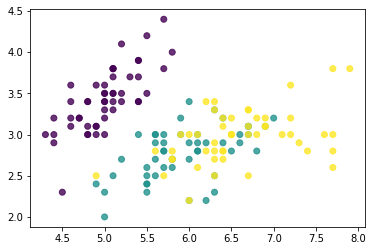

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

1. Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
# test_size=0.2 indique que 20 % du jeu de données est utilisé pour le tests
# random_state permet de contrôler l'aléatoire

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


In [15]:
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (120, 4) (120, 1)
Test set: (30, 4) (30, 1)


Text(0.5, 1.0, 'Test set')

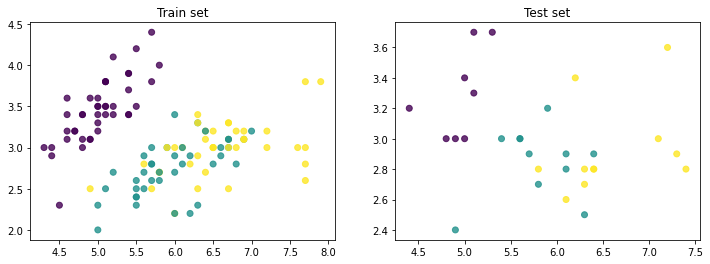

In [50]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')

plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
plt.title('Test set')

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
model = KNeighborsClassifier(n_neighbors=8)

model.fit(X_train, y_train)

print('train score:', model.score(X_train, y_train)) # machine surentraînée sur données qu'elle a déjà vues
print('test score:', model.score(X_test, y_test))

train score: 0.975
test score: 1.0


2. Validation Set et Cross Validation

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, StratifiedKFold, GroupKFold

In [54]:
cv = KFold(5, random_state=0, shuffle=True) # découper notre modèle en 5 splits
# cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=cv) 
cross_val_score(KNeighborsClassifier(), X, y, cv=cv) 

array([0.96666667, 0.9       , 1.        , 1.        , 0.93333333])

In [55]:
cv = LeaveOneOut()
cross_val_score(KNeighborsClassifier(), X, y, cv=cv) 

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [56]:
cv = ShuffleSplit(4, test_size=0.2) # 4 = nombre de splits, test_size = quantité/proportion de notre test size, cf train_test_split(test_size=0.2)
cross_val_score(KNeighborsClassifier(), X, y, cv=cv) 

array([1.        , 1.        , 0.93333333, 1.        ])

In [57]:
cv = StratifiedKFold(4) # 4 = nombre de splits, test_size = quantité/proportion de notre test size, cf train_test_split(test_size=0.2)
cross_val_score(KNeighborsClassifier(), X, y, cv=cv) 

array([0.97368421, 0.94736842, 0.94594595, 1.        ])

In [58]:
cv = GroupKFold(5).get_n_splits(X, y, groups=X[:,0]) # 5 = nombre de splits / entraînements que 'lon veut avoir
# groups = classes de passagers du Titanic par exemple
cross_val_score(KNeighborsClassifier(), X, y, cv=cv)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [59]:
n_neighbors=11
model = KNeighborsClassifier(n_neighbors) 
# model = KNeighborsClassifier(2)
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy') 
# cv = nombre de split que l'on veut dans notre Cross Validation
# scoring = métrique que l'on veut utiliser pour évaluer notre modèle, par défaut = métrique associée à notre validateur

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

In [60]:
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

0.9833333333333334

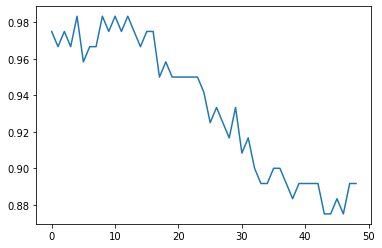

In [61]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

3. Validation Curve

In [62]:
from sklearn.model_selection import validation_curve

c:\Users\arthu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


(49, 5)
[[1.         1.         0.95833333 0.95833333 0.95833333]
 [0.95833333 1.         0.95833333 0.95833333 0.95833333]
 [1.         1.         0.95833333 0.95833333 0.95833333]
 [1.         0.95833333 0.95833333 0.95833333 0.95833333]
 [1.         1.         1.         0.95833333 0.95833333]
 [0.95833333 0.95833333 0.95833333 0.95833333 0.95833333]
 [1.         0.95833333 0.95833333 0.95833333 0.95833333]
 [1.         0.95833333 0.95833333 0.95833333 0.95833333]
 [1.         1.         1.         0.95833333 0.95833333]
 [1.         1.         0.95833333 0.95833333 0.95833333]
 [1.         1.         1.         0.95833333 0.95833333]
 [1.         1.         0.95833333 0.95833333 0.95833333]
 [1.         1.         1.         0.95833333 0.95833333]
 [1.         0.95833333 1.         0.95833333 0.95833333]
 [1.         0.91666667 1.         0.95833333 0.95833333]
 [1.         0.95833333 1.         0.95833333 0.95833333]
 [1.         0.95833333 1.         0.95833333 0.95833333]
 [0.95

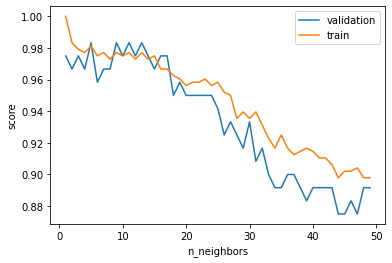

In [63]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train, 'n_neighbors', k, cv=5) 
# n_neighbors = nom de l'hyperparamètre que l'on souhaite régler

print(val_score.shape) # dimension = (49, 5) pour les 5 colonnes de notre cross validation
print(val_score)
print(val_score.mean(axis=1))

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()

4. GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid = {'n_neighbors': np.arange(1, 20), 'metric': ['euclidean', 'manhattan']}
# Ce dictionnaire contient tous les hyperparamètres à tester

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train) # On entraîne la grille comme s'il s'agissait d'un estimateur

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [66]:
print(grid.best_score_) # La meilleure performance parmi les modèles
print(grid.best_params_)  # Les meilleurs paramètres du modèle

0.9833333333333334
{'metric': 'euclidean', 'n_neighbors': 5}


In [67]:
model = grid.best_estimator_ # On crée notre modèle
model.score(X_test, y_test) # On teste (évalue) notre modèle sur les données X_test, y_test afin d'avoir un aperçu de sa perf dans la vraie vie

0.9333333333333333

5. Confusion Matrix

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
confusion_matrix(y_test, model.predict(X_test)) # évaluation (y_test, y_pred)
# Ici, les 8 points de la classe 1 (de fleurs) ont bien été classés

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

6. Learning Curve

In [70]:
from sklearn.model_selection import learning_curve

In [71]:
print(X_train.shape)
y_train = y_train.reshape(120, 1) 
print(y_train.shape)

(120, 4)
(120, 1)


c:\Users\arthu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\arthu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\arthu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\arthu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:179: Data

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[ 9 19 28 38 48 57 67 76 86 96]


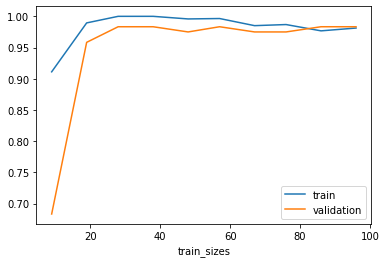

In [72]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)
# train_sizes=np.linspace(0.1, 1, 10) = quantité de données à entrer pour l'entraînement
# -> % de début, % de fin et nombre de lots qu'on veut avoir
print(np.linspace(0.1, 1, 10))

print(N) # différentes quantités présentes dans chaque lot (cf capture)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

# -> On voit que la perf n'évolue presque plus à partir du moment où on a 60 points dans notre dataset
# -> le modèle va continuer à stagner
# Rappel : Train set: (120, 4)